In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

В данном датасете нужно определить качество вина, делать это будем при помощи кластеризации.

In [2]:
dataset = pd.read_csv('winequality-red.csv')
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Из данных видно, что не нужна обработка.

Построим график зависимости количества кластеров и внутри-кластерная сумма расстояний.

D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


Text(0, 0.5, 'Внутри-кластерная сумма расстояний')

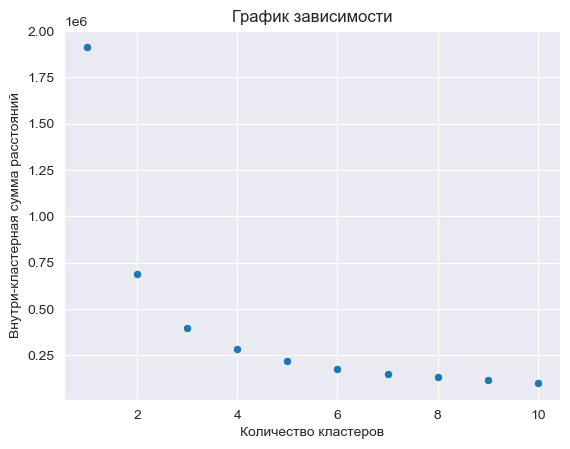

In [3]:

inertia = []

for i in range(1, 11):
    k_means = KMeans(n_clusters=i, init= 'k-means++')
    k_means.fit(
        dataset.drop(
            "quality",
            axis=1,
        )
    )
    inertia.append(k_means.inertia_)

sns.set_style('darkgrid')
sns.scatterplot(
    x=[x for x in range(1, 11)],
    y=inertia,
)

plt.title('График зависимости')
plt.xlabel('Количество кластеров')
plt.ylabel('Внутри-кластерная сумма расстояний')

По графику видно, что оптимальным числом кластеров является 4.

In [4]:
CLUSTERS = 5

model = KMeans(
    n_clusters=CLUSTERS
)

model.fit(
    dataset.drop(
        "quality",
        axis=1,
    )
)

clusters = pd.DataFrame(
    columns=dataset.columns.drop("quality"),
    data=model.cluster_centers_
)

clusters["Amount"] = np.unique(
    model.labels_,
    return_counts=True
)[1]

clusters 

D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Amount
0,8.621070,0.512960,0.287575,2.425251,0.084022,7.478261,18.489967,0.996637,3.299682,0.653796,10.642252,598
1,8.240273,0.521416,0.276758,2.407679,0.095020,24.784983,62.071672,0.996915,3.322799,0.684266,10.285267,293
2,8.057143,0.558643,0.323571,3.445714,0.089514,32.064286,138.771429,0.997142,3.234429,0.702286,9.791429,70
3,7.803191,0.576676,0.260319,3.110106,0.088660,23.473404,94.675532,0.996842,3.313617,0.638723,10.117819,188
4,8.227333,0.526533,0.241422,2.395333,0.086309,15.538889,38.988889,0.996681,3.329578,0.648178,10.447000,450


Из этого набора можно получить об оценке качества вин по их составу, что может помочь улучшить процесс их производства и добиться лучшего качества.